In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np

In [2]:
"""
File Reading
"""
a = []
for i in range(32):
    try:
        for j in range(100):
            with open("../TrainingData/TeslaTrainingData_2019-10-"+str(i)+"/Tesla"+str(j)+".txt", mode='rb') as file:
                try:
                    a.append(str(file.read()))
                except Exception as e:
                    print(e)
                    print(file.name)
    except:
        print("10/"+str(i))
for i in range(32):
    if i != 10:
        try:
            for j in range(100):
                with open("../TrainingData/TeslaTrainingData_2019-11-"+str(i)+"/Tesla"+str(j)+".txt", mode='rb') as file:
                    try:
                        a.append(str(file.read()))
                    except Exception as e:
                        print(file.name)
        except:
            print("11/"+str(i))
            
for i in range(32):
    if i != 10:
        try:
            for j in range(100):
                with open("../TrainingData/TeslaTrainingData_2019-12-"+str(i)+"/Tesla"+str(j)+".txt", mode='rb') as file:
                    try:
                        a.append(str(file.read()))
                    except Exception as e:
                        print(file.name)
        except:
            print("11/"+str(i))
print(len(a))

10/0
10/1
10/2
10/3
10/4
10/5
10/6
10/7
10/8
10/9
10/10
10/11
10/12
10/13
10/19
10/20
10/26
10/27
11/0
11/2
11/3
11/9
11/16
11/17
11/22
11/23
11/24
11/30
11/31
11/0
11/1
11/7
11/8
11/14
11/15
11/17
11/18
11/19
11/20
11/21
11/22
11/23
11/24
11/25
11/26
11/27
11/28
11/29
11/30
11/31
4400


In [3]:
"""
Neural Network Model Creation
"""

"""
Based on code from https://medium.com/@sabber/classifying-yelp-review-comments-using-lstm-and-word-embeddings-part-1-eb2275e4066b
"""

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
x_train = np.array(a, dtype=np.str)
x_train = x_train.astype(str)
# print(x_train.shape)
y_train = np.zeros(2700)+0.9
import tensorflow as tf
embed_size = 300 
max_features = 50000 
maxlen = 100
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(x_train))
x_train = tokenizer.texts_to_sequences(x_train)
model1 = tf.keras.Sequential()
model1.add(Embedding(max_features, embed_size, input_length=maxlen))
model1.add(Bidirectional(LSTM(128, return_sequences=True)))
model1.add(GlobalMaxPool1D())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(2,activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-1), metrics=['accuracy'])
model1.summary()
x_trainR = np.array(x_train)[:2200]
y_trainR = np.array(y_train)[:2200]
x_test = np.array(x_train)[2200:]
y_test = np.array(y_train)[2200:]
x_train = x_trainR
y_train = y_trainR
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          15000000  
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 256)          439296    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 15,474,290
Trainable params: 15,474,290
Non-trainable params: 0
____________________________________________

In [4]:
"""
Formats data labels
"""
def toFinal(a):
    for i in range(len(a)):
        if a[i] > 0:
            a[i] = 1
        else:
            a[i] = 0

In [5]:
"""
Reads and formats data labels
"""
y_train = []
for i in range(32):
    try:
        with open("../TrainingData/TeslaTrainingData_2019-10-"+str(i)+"/Tesla.csv") as file:
            j = file.read().split(',')[1]
            assert j is not None
            j = j.replace('\n','')
            for _ in range(100):
                y_train.append(float(j))
    except:
        print("Bad: 10/"+str(i))
for i in range(32):
    try:
        with open("../TrainingData/TeslaTrainingData_2019-11-"+str(i)+"/Tesla.csv") as file:
            j = file.read().split(',')[1]
            assert j is not None
            j = j.replace('\n','')
            for _ in range(100):
                y_train.append(float(j))
    except:
        print("Bad: 11/"+str(i))
    
for i in range(32):
    try:
        with open("../TrainingData/TeslaTrainingData_2019-12-"+str(i)+"/Tesla.csv") as file:
            j = file.read().split(',')[1]
            assert j is not None
            j = j.replace('\n','')
            for _ in range(100):
                y_train.append(float(j))
    except:
        print("Bad: 12/"+str(i))
toFinal(y_train)
# print(y_train)
y_train = np.array(y_train)
# print(y_train)

print(y_train.shape)
print(x_train.shape)
print(x_test.shape)

Bad: 10/0
Bad: 10/1
Bad: 10/2
Bad: 10/3
Bad: 10/4
Bad: 10/5
Bad: 10/6
Bad: 10/7
Bad: 10/8
Bad: 10/9
Bad: 10/10
Bad: 10/11
Bad: 10/12
Bad: 10/13
Bad: 10/19
Bad: 10/20
Bad: 10/23
Bad: 10/25
Bad: 10/26
Bad: 10/27
Bad: 11/0
Bad: 11/2
Bad: 11/3
Bad: 11/9
Bad: 11/10
Bad: 11/16
Bad: 11/17
Bad: 11/22
Bad: 11/23
Bad: 11/24
Bad: 11/28
Bad: 11/30
Bad: 11/31
Bad: 12/0
Bad: 12/1
Bad: 12/7
Bad: 12/8
Bad: 12/14
Bad: 12/15
Bad: 12/16
Bad: 12/17
Bad: 12/18
Bad: 12/19
Bad: 12/20
Bad: 12/21
Bad: 12/22
Bad: 12/23
Bad: 12/24
Bad: 12/25
Bad: 12/26
Bad: 12/27
Bad: 12/28
Bad: 12/29
Bad: 12/30
Bad: 12/31
(4100,)
(2200, 100)
(2200, 100)


In [6]:
print(np.count_nonzero(y_train))
print(y_train.size)
y_test = y_train[1200:1500]
y_train = y_train[:1200]
x_test = x_train[1200:1500]
x_train = x_train[:1200]
print(x_test.shape)
print(y_test.shape)

2500
4100
(300, 100)
(300,)


In [7]:
"""
Trains Model
"""
history = model1.fit(x_train, y_train, epochs=20, batch_size=200, validation_data=(x_test, y_test))

Train on 1200 samples, validate on 300 samples
Epoch 1/20
1200/1200 [==============================] - 6s 5ms/sample - loss: 5.3592 - accuracy: 0.4833 - val_loss: 0.6978 - val_accuracy: 0.4433
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/sample - loss: 0.6856 - accuracy: 0.5725 - val_loss: 0.7466 - val_accuracy: 0.3333
Epoch 3/20
1200/1200 [==============================] - 4s 3ms/sample - loss: 0.6849 - accuracy: 0.5725 - val_loss: 0.7799 - val_accuracy: 0.3333
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/sample - loss: 0.6806 - accuracy: 0.5833 - val_loss: 0.7897 - val_accuracy: 0.3333
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/sample - loss: 0.6802 - accuracy: 0.5833 - val_loss: 0.7634 - val_accuracy: 0.3333
Epoch 6/20
1200/1200 [==============================] - 4s 4ms/sample - loss: 0.6792 - accuracy: 0.5833 - val_loss: 0.7540 - val_accuracy: 0.3333
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/sample - loss:

In [8]:
def predict(x):
    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(list(x))
    x =pad_sequences(tokenizer.texts_to_sequences(x), maxlen=maxlen)
    return model1.predict(x)

In [9]:
print(model1.weights)

[<tf.Variable 'embedding/embeddings:0' shape=(50000, 300) dtype=float32, numpy=
array([[-0.21322532,  0.6380954 , -0.45791024, ..., -0.39759615,
         0.8104328 ,  0.20711853],
       [ 0.1916986 ,  0.6321555 , -0.44574457, ..., -0.66688573,
        -0.369933  , -0.45028588],
       [-0.75548476,  0.6053386 ,  0.7871165 , ...,  0.36150616,
         0.5032914 ,  0.642595  ],
       ...,
       [ 0.02007142,  0.01667701, -0.01867783, ..., -0.03064322,
        -0.00820215, -0.0243973 ],
       [-0.00497616, -0.0340758 ,  0.01612142, ...,  0.01692438,
         0.01479105,  0.01134346],
       [ 0.01401443,  0.03364828,  0.03644099, ..., -0.01265327,
         0.00114578,  0.0412217 ]], dtype=float32)>, <tf.Variable 'bidirectional/forward_lstm/kernel:0' shape=(300, 512) dtype=float32, numpy=
array([[ 5.4518485e-01,  6.9429845e-01,  4.5433307e-01, ...,
         5.4390061e-01,  6.9811958e-01,  5.7498473e-01],
       [ 5.6063479e-01, -6.0040736e-01, -8.0709058e-01, ...,
         6.0061306e-0

<IPython.core.display.Javascript object>


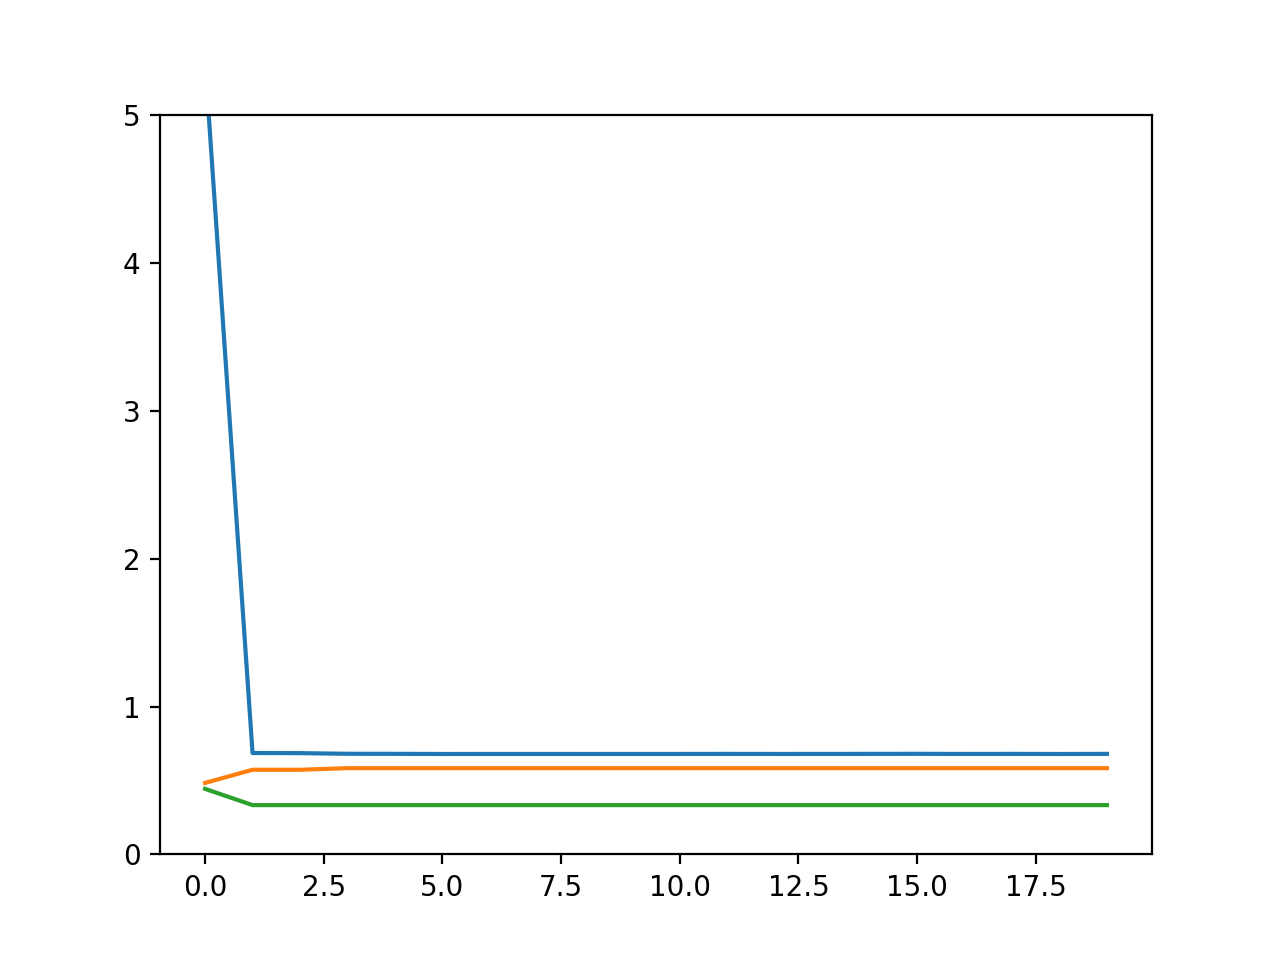

(0, 5)

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
loss = history.history['loss']
plt.plot(loss)
acc = history.history['accuracy']
plt.plot(acc)
val_acc = history.history['val_accuracy']
plt.plot(val_acc)
plt.ylim(0,5)

In [11]:
print(len(y_test[y_test==0]))
print(len(y_test[y_test==1]))

200
100
